In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [2]:
m2 = pd.read_csv('../../dataset/Indicators/monetary_supply.csv', encoding='unicode_escape')
interest_rates = pd.read_csv('../../dataset/Indicators/interest_rates.csv', encoding='unicode_escape')
cpi = pd.read_csv('../../dataset/Indicators/cpi_yoy.csv', encoding='unicode_escape')

In [3]:
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '1976-06-01') & (df.index <= '2022-11-02')]
    return df

In [4]:
m2 = cleaned_indicator(m2)
interest_rates = cleaned_indicator(interest_rates)
cpi = cleaned_indicator(cpi)

In [5]:
def m2_int_cpi_vis():
    fig, (ax1, ax3) = plt.subplots(2)
    fig.suptitle('Interest Rates vs M2 and CPI vs M2 over time', x=0.4, y=1)
    comment_txt = '''\
Interest Rates start to rise at times when inflation must be controlled.\nIR : CPI --> Positive lagged correlation (IR follow CPI data).\nExponential money printing within the years.
    '''
    plt.figtext(0.15, -0.1, comment_txt)
    
    #color = 'tab:black'
    ax1.set_title('US Interest Rates vs M2')
    ax1.set_xlabel('Years')
    ax1.set_ylabel('%', color='black')
    ax1.plot(interest_rates.index, interest_rates.close, color='black', label = 'Interest Rates', linewidth=1.5, linestyle='solid')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(bbox_to_anchor=(1.15, 1.05), loc = 'upper left')

    #ax.legend(bbox_to_anchor=(1.1, 1.05))
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Monetary Supply (M2 in billions)', color = "red")  # we already handled the x-label with ax1
    ax2.plot(m2.index, m2['close (in billions)'], color="red", label = 'M2', linewidth=1, linestyle='dashdot')
    ax2.tick_params(axis='y', labelcolor = "red")
    ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')

    ax3.plot(cpi.index, cpi.close, color = "black", label = 'CPI YoY', linewidth=1.5, linestyle='solid')
    ax3.set_title('US CPI vs M2')
    ax3.set_xlabel('Years')
    ax3.set_ylabel('CPI YoY change (%)', color='black')
    ax3.legend(bbox_to_anchor=(1.15, 1.05), loc = 'upper left')

    ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
    ax4.set_ylabel('Monetary Supply (M2 in billions)', color = "red")  # we already handled the x-label with ax1
    ax4.plot(m2.index, m2['close (in billions)'], color="red", label = 'M2', linewidth=1, linestyle='dashdot')
    ax4.tick_params(axis='y', labelcolor = "red")
    ax4.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')


    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.style.use('seaborn-dark')
    print(plt.style.available)
    return plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


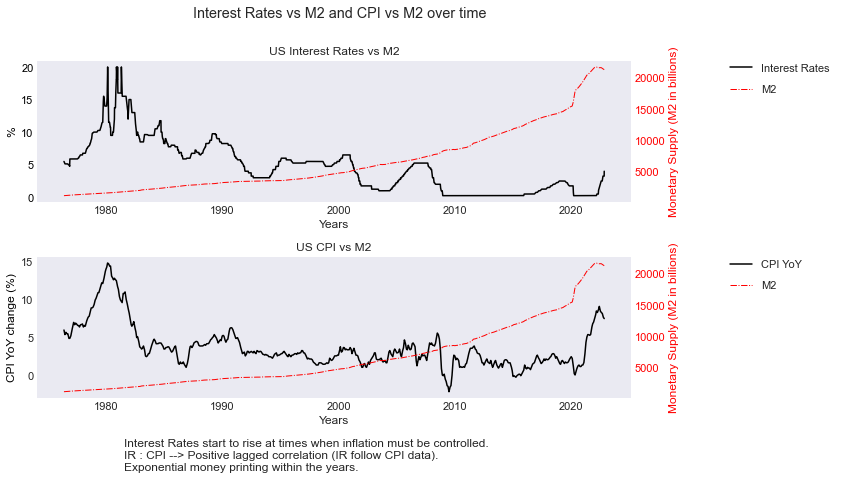

In [7]:
m2_int_cpi_vis()

In [12]:
def m2_ir_cpi_comparison():
    fig, (ax1, ax3, ax5) = plt.subplots(3, figsize=(14,12))
    fig.suptitle('Comparison between Interest rates vs CPI vs M2 over time', x=0.4, y=1, fontsize = 20)
    comment_txt = '''\
Interest Rates start to rise at times when inflation needs to be controlled.\nIR : CPI --> Positive lagged correlation (IR follow CPI data).\nExponential money printing over time.
    '''
    plt.figtext(0.15, -0.1, comment_txt, fontsize = 16)
    
    #color = 'tab:black'
    ax1.set_title('US Interest Rates vs M2', fontsize= 14)
    ax1.set_xlabel('Years', fontsize= 14)
    ax1.set_ylabel('Interest Rates (%)', color='black', fontsize= 14)
    ax1.plot(interest_rates.index, interest_rates.close, color='black', label = 'Interest Rates', linewidth=2, linestyle='solid')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(bbox_to_anchor=(1.1, 1.05), loc = 'upper left', fontsize= 16)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Monetary Supply (USD in B)', color = "blue", fontsize= 14) 
    ax2.plot(m2.index, m2['close (in billions)'], color="blue", label = 'M2', linewidth=2, alpha = 0.4, linestyle='solid')
    ax2.tick_params(axis='y', labelcolor = "blue")
    ax2.legend(bbox_to_anchor=(1.1, 0.9), loc = 'upper left', fontsize= 16)

    ax3.plot(cpi.index, cpi.close, color = "black", label = 'CPI YoY', linewidth=2, linestyle='solid')
    ax3.set_title('US CPI vs M2', fontsize= 14)
    ax3.set_xlabel('Years', fontsize= 14)
    ax3.set_ylabel('CPI YoY change (%)', color='black', fontsize= 14)
    ax3.legend(bbox_to_anchor=(1.1, 1.05), loc = 'upper left', fontsize= 16)

    ax4 = ax3.twinx()  
    ax4.set_ylabel('Monetary Supply (USD in B)', color = "blue", fontsize= 14)  
    ax4.plot(m2.index, m2['close (in billions)'], color="blue", label = 'M2', linewidth=2, alpha = 0.4, linestyle='solid')
    ax4.tick_params(axis='y', labelcolor = "blue")
    ax4.legend(bbox_to_anchor=(1.1, 0.9), loc = 'upper left', fontsize= 16)

    ax5.plot(cpi.index, cpi.close, color = "black", label = 'CPI YoY', linewidth=2, linestyle='solid')
    ax5.set_title('US CPI vs US Interest Rates', fontsize= 14)
    ax5.set_xlabel('Years', fontsize= 14)
    ax5.set_ylabel('CPI YoY change (%)', color='black', fontsize= 14)
    ax5.legend(bbox_to_anchor=(1.1, 1.05), loc = 'upper left', fontsize= 16)

    ax6 = ax5.twinx() 
    ax6.set_ylabel('Interest Rates (%)', color='blue', fontsize= 14)  
    ax6.plot(interest_rates.index, interest_rates.close, color='blue', label = 'Interest Rates', linewidth=2, alpha = 0.4, linestyle='solid')    
    ax6.tick_params(axis='y', labelcolor = "blue")
    ax6.legend(bbox_to_anchor=(1.1, 0.9), loc = 'upper left', fontsize= 16)


    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.style.use('seaborn-dark')
    print(plt.style.available)
    return plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


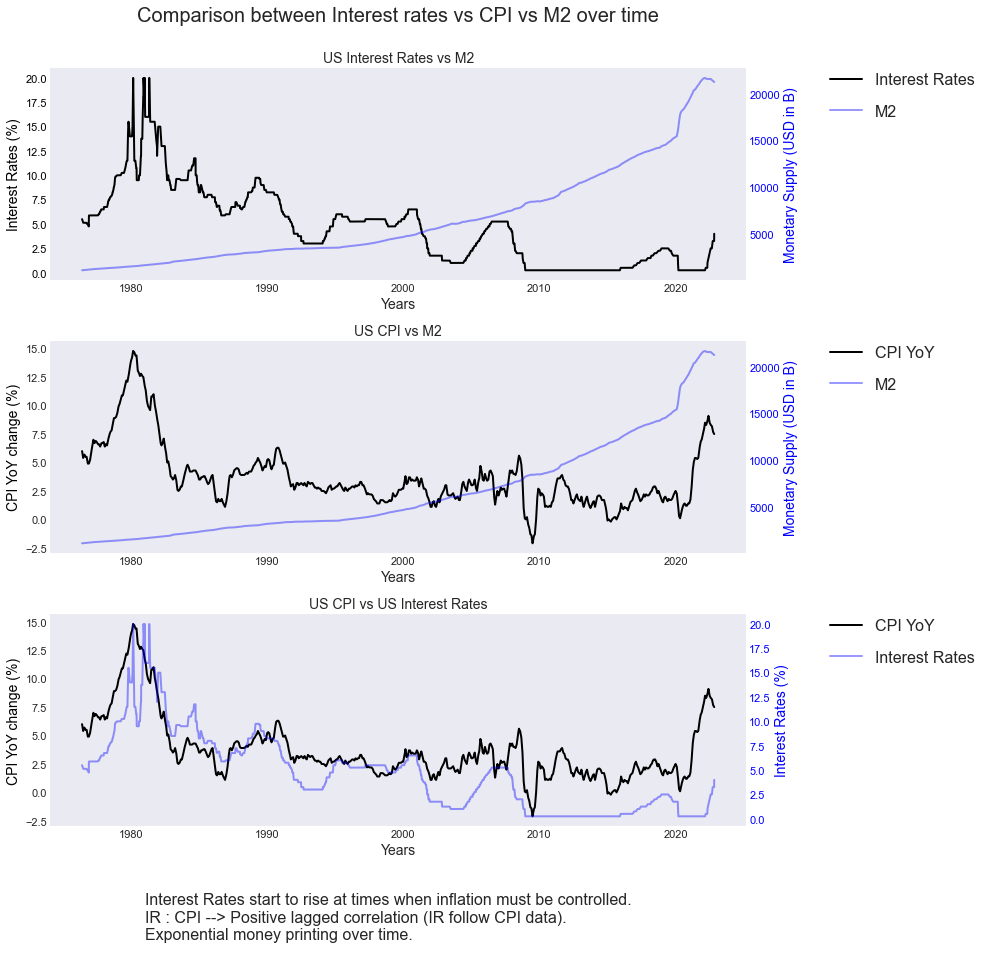

In [13]:
m2_ir_cpi_comparison()